# Q3 - Gamma Correction

In [42]:
import numpy as np, cv2 as cv, matplotlib.pyplot as plt
from pathlib import Path

DATA = Path("../data")
RESULTS = Path("../results/q3")
RESULTS.mkdir(parents=True, exist_ok=True)

img_path = DATA / "a1images" / "highlights_and_shadows.jpg"  # place the image here
img_bgr = cv.imread(str(img_path), cv.IMREAD_COLOR)
assert img_bgr is not None, f"Image not found at {img_path}"
print("Input shape:", img_bgr.shape)

Input shape: (480, 720, 3)


In [43]:
# Convert to Lab
lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2LAB)
img_bgr = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
L, a, b = cv.split(lab)

In [44]:
# Choose gamma
gamma = 0.8  # Adjust this value as needed

L_f = L.astype(np.float32) / 255.0          # [0,1]
L_corr = np.power(L_f, gamma)               # gamma correction
L_corr_u8 = np.clip(L_corr * 255.0, 0, 255).astype(np.uint8)

lab_corr = cv.merge([L_corr_u8, a, b])
bgr_corr = cv.cvtColor(lab_corr, cv.COLOR_LAB2BGR)

bgr_corr_rgb = cv.cvtColor(bgr_corr, cv.COLOR_BGR2RGB)

cv.imwrite(str(RESULTS/"q3_gamma_corrected_bgr.png"), bgr_corr)
cv.imwrite(str(RESULTS/"q3_L_original.png"), L)
cv.imwrite(str(RESULTS/"q3_L_corrected.png"), L_corr_u8)
print("Saved corrected image and L planes to", RESULTS)

Saved corrected image and L planes to ../results/q3


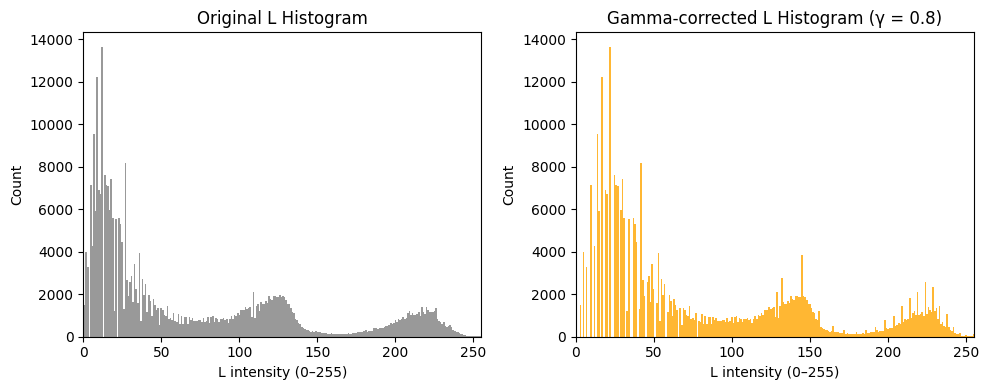

In [45]:
# Histograms: original vs corrected L (separate subplots)
bins = np.arange(257)
hist_L = cv.calcHist([L], [0], None, [256], [0, 256]).ravel()
hist_Lc = cv.calcHist([L_corr_u8], [0], None, [256], [0, 256]).ravel()

plt.figure(figsize=(10, 4))

# Original L histogram
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], hist_L, width=1, color='gray', alpha=0.8)
plt.title("Original L Histogram")
plt.xlabel("L intensity (0–255)")
plt.ylabel("Count")
plt.xlim([0, 255])

# Gamma-corrected L histogram
plt.subplot(1, 2, 2)
plt.bar(bins[:-1], hist_Lc, width=1, color='orange', alpha=0.8)
plt.title(f"Gamma-corrected L Histogram (γ = {gamma})")
plt.xlabel("L intensity (0–255)")
plt.ylabel("Count")
plt.xlim([0, 255])

plt.tight_layout()
plt.savefig(RESULTS/f"q3_histograms_subplots_gamma_{gamma}.png", dpi=150)
plt.show()

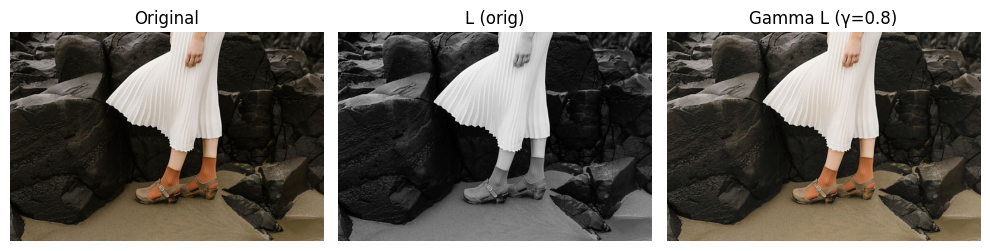

In [46]:
# Side-by-side preview
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
#plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
plt.imshow(img_bgr)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(L, cmap='gray')
plt.title("L (orig)")
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(bgr_corr, cv.COLOR_BGR2RGB))
plt.title(f"Gamma L (γ={gamma})")
plt.axis('off')
plt.tight_layout()
plt.savefig(RESULTS/f"q3_triptych_gamma_{gamma}.png", dpi=150); plt.show()

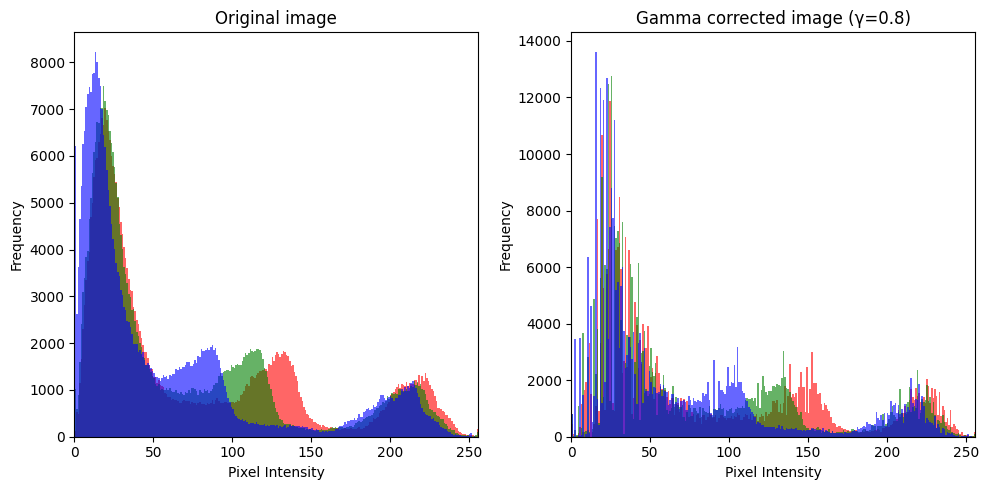

In [47]:
# Color channels
colors = ('r', 'g', 'b')

plt.figure(figsize=(10, 5))

# Original image histograms
plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    channel_flat = img_bgr[:, :, i].flatten()
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)
plt.title('Original image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

# Gamma-corrected image histograms
plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    channel_flat = bgr_corr_rgb[:, :, i].flatten()
    plt.hist(channel_flat, bins=256, range=(0, 256), color=col, alpha=0.6)
plt.title(f'Gamma corrected image (γ={gamma})')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.tight_layout()
plt.savefig(RESULTS/f"q3_rgb_histograms_gamma_{gamma}.png", dpi=150)
plt.show()